# 1. Importación de Librerías y Carga de Datos

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Definir transformaciones para los datos
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Cargar los datos de Fashion MNIST
trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Verificar el tamaño del dataset
print(f"Tamaño del conjunto de entrenamiento: {len(trainset)}")
print(f"Tamaño del conjunto de prueba: {len(testset)}")

Tamaño del conjunto de entrenamiento: 60000
Tamaño del conjunto de prueba: 10000


## Comentarios:

- Se importan las librerías necesarias para el proyecto.
- Se definen las transformaciones para normalizar los datos.
- Se cargan los datos de Fashion MNIST y se configuran los cargadores de datos para entrenamiento y prueba.
- Se imprime el tamaño del conjunto de entrenamiento y de prueba.


# 2. Definir la Arquitectura del Modelo

In [12]:
class Fortnite(nn.Module):
    def __init__(self):
        super(Fortnite, self).__init__()
        #Capas convolucionares
        #Capa 1 de convolucion, 16 kernel tamaño 5x5
        self.conv1 = nn.Conv2d(1, 16, 5, 1)
        #Capa 2 de convolucion, 32 kernel de tamaño 5x5
        self.conv2 = nn.Conv2d(16, 32, 5, 1)
        #Capa 3 de convolucion, 48 kernel de tamaño 3x3
        self.conv3 = nn.Conv2d(32, 48, 3, 1)
        #Capa 4 de convolucion, 64 kernel de tamaño 3x3
        self.conv4 = nn.Conv2d(48, 64, 3, 1)

        #Capas fully connected
        #Capa oculta 1 32 nodos
        self.fc1 = nn.Linear(256, 32)
        #Capa de salida 10 nodos
        self.fc2 = nn.Linear(32, 10)

        #Probabilidad de Dropout
        self.dropout = nn.Dropout(0.30)
    
    def forward(self, x):
        #Convolucon 1 y max pool
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 1, 1)
        #Convolucion 2 y max pool
        x = self.dropout(F.max_pool2d(F.relu(self.conv2(x)), 2, 2, 1))
        #Convolucion 3 y max pool
        x = self.dropout(F.max_pool2d(F.relu(self.conv3(x)), 2, 1, 1))
        #Convolucion 4 y max pool
        x = self.dropout(F.max_pool2d(F.relu(self.conv4(x)), 4, 4, 1))
        #Se convierte el mapa de activacion resultante en una matriz vector para la fase de clasificacion
        x = torch.flatten(x, 1)
        #Capa oculta de clasificacion 1
        x = self.dropout(F.relu(self.fc1(x)))
        #Capa de salida
        output = self.fc2(x)
        
        
        return output
        
model = Fortnite()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Comentarios:
- Se define la clase Fortnite que representa la arquitectura de la red neuronal convolucional.
- Se inicializan las capas convolucionales, las capas totalmente conectadas y las capas de dropout.
- Se define la función forward que especifica cómo los datos pasan a través de la red.
- Se instancia el modelo, se define la función de pérdida Cross Entropy Loss y el optimizador Adam.

# 3. Entrenamiento del Modelo

Para el entrenamiento, se asigna el modelo y las entradas al procesamiento de cuda para ser procesados por el GPU y acelerar el entrenamiento

In [13]:
model.to('cuda')

for epoch in range(10):
    running_loss = 0.0
    i = 0
    for images, labels in trainloader:
        images, labels = images.to('cuda'), labels.to('cuda')
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        i+= 1
        if i % 100 == 99:    # Imprimir cada 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Fortnite Training')

Epoch 1, Batch 100, Loss: 1.547
Epoch 1, Batch 200, Loss: 0.973
Epoch 1, Batch 300, Loss: 0.858
Epoch 1, Batch 400, Loss: 0.813
Epoch 1, Batch 500, Loss: 0.736
Epoch 1, Batch 600, Loss: 0.715
Epoch 1, Batch 700, Loss: 0.701
Epoch 1, Batch 800, Loss: 0.655
Epoch 1, Batch 900, Loss: 0.638
Epoch 2, Batch 100, Loss: 0.602
Epoch 2, Batch 200, Loss: 0.612
Epoch 2, Batch 300, Loss: 0.589
Epoch 2, Batch 400, Loss: 0.590
Epoch 2, Batch 500, Loss: 0.602
Epoch 2, Batch 600, Loss: 0.564
Epoch 2, Batch 700, Loss: 0.570
Epoch 2, Batch 800, Loss: 0.566
Epoch 2, Batch 900, Loss: 0.548
Epoch 3, Batch 100, Loss: 0.541
Epoch 3, Batch 200, Loss: 0.550
Epoch 3, Batch 300, Loss: 0.519
Epoch 3, Batch 400, Loss: 0.515
Epoch 3, Batch 500, Loss: 0.515
Epoch 3, Batch 600, Loss: 0.517
Epoch 3, Batch 700, Loss: 0.522
Epoch 3, Batch 800, Loss: 0.495
Epoch 3, Batch 900, Loss: 0.513
Epoch 4, Batch 100, Loss: 0.485
Epoch 4, Batch 200, Loss: 0.497
Epoch 4, Batch 300, Loss: 0.479
Epoch 4, Batch 400, Loss: 0.495
Epoch 4,

## Comentarios:

- Se entrena el modelo durante 10 épocas.
- Se itera sobre los datos de entrenamiento, calculando las predicciones y actualizando los pesos del modelo.
- Se imprime la pérdida de entrenamiento cada 100 mini-lotes.

# 4. Evaluación del Modelo

In [10]:
correctTrain = 0
totalTrain = 0
correctTest = 0
totalTest = 0
with torch.no_grad():
    model.eval()
    for images, labels in trainloader:
        images, labels = images.to('cuda'), labels.to('cuda')
        outputs = F.log_softmax(model(images), dim = 1)
        _, predicted = torch.max(outputs.data, 1)
        totalTrain += labels.size(0)
        correctTrain += (predicted == labels).sum().item()

    for images, labels in testloader:
        images, labels = images.to('cuda'), labels.to('cuda')
        outputs = F.log_softmax(model(images), dim = 1)
        _, predicted = torch.max(outputs.data, 1)
        totalTest += labels.size(0)
        correctTest += (predicted == labels).sum().item()

model.train()

print(f'Accuracy on the train set for Fortnite: {100 * correctTrain / totalTrain:.2f}%')
print(f'Accuracy on the test set for Fortnite: {100 * correctTest / totalTest:.2f}%')

Accuracy on the train set for Fortnite: 86.56%
Accuracy on the test set for Fortnite: 85.52%


## Comentarios:

- Se evalúa el modelo en el conjunto de prueba sin calcular gradientes.
- Se calculan las predicciones y se compara con las etiquetas reales para calcular la precisión.
- Se imprime la precisión del modelo en el conjunto de prueba.


# 5. Visualización de Mapas de Activación

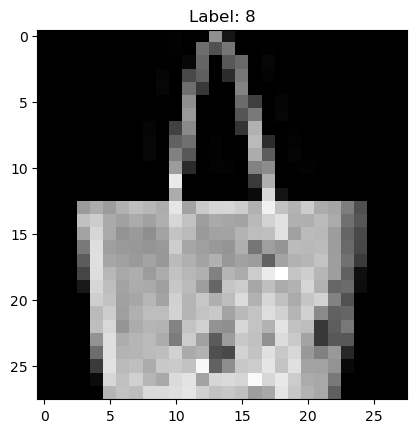

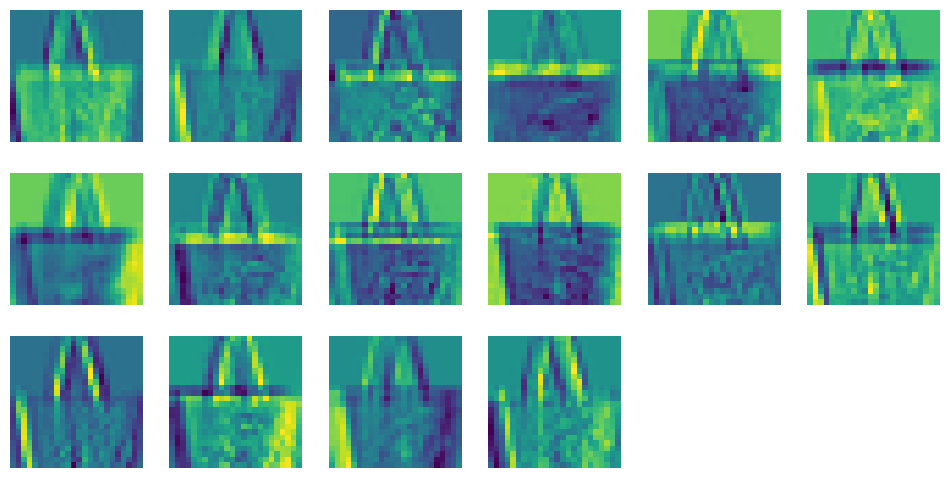

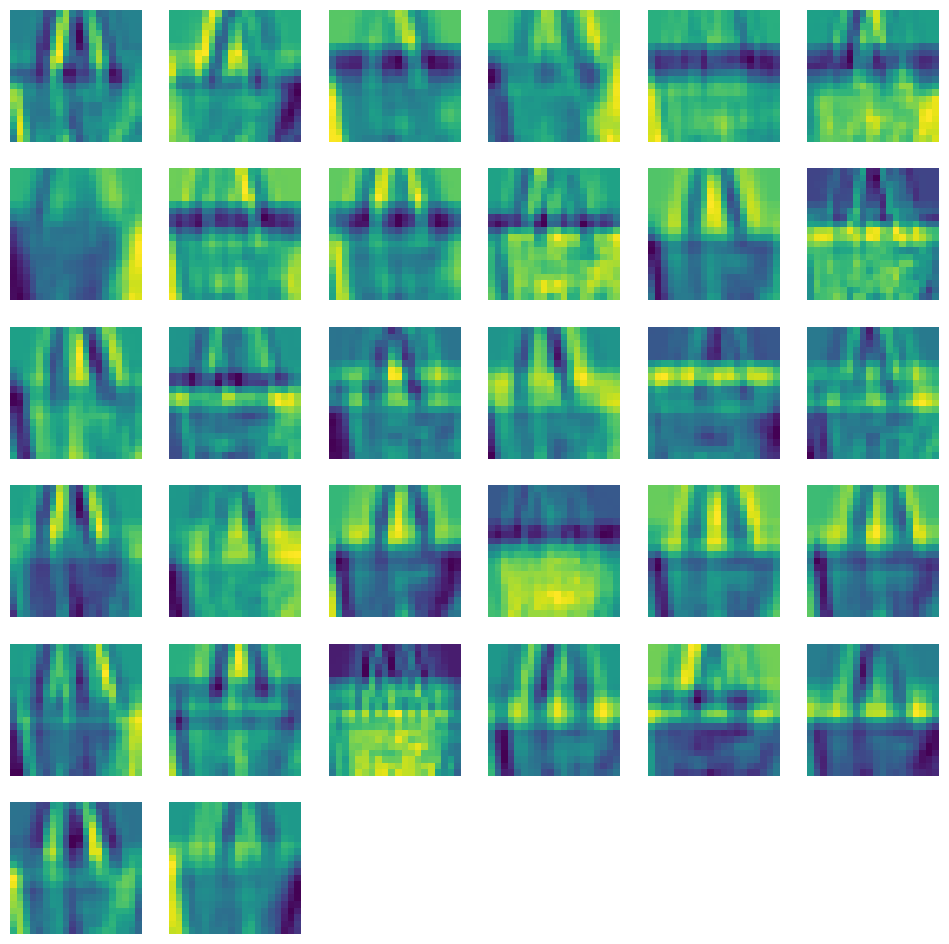

In [21]:
model.to('cpu')

def get_activation(layer, input):
    return layer(input)

# Función para visualizar los mapas de activación
def plot_activations(activation):
    num_activations = activation.shape[1]
    size = activation.shape[2]
    num_cols = 6
    num_rows = num_activations // num_cols + 1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*2, num_rows*2))
    for i, ax in enumerate(axes.flat):
        if i < num_activations:
            img = activation[0, i].detach().numpy()
            ax.imshow(img, cmap='viridis')
        ax.axis('off')
    plt.show()

# Función para visualizar las activaciones de una imagen específica
def visualize_image_activations(image_index):
    # Seleccionar una imagen de prueba
    dataiter = iter(testloader)
    for _ in range(image_index + 1):
        images, labels = next(dataiter)  # Usar la función next() de Python para obtener el siguiente elemento

    test_image = images[0].unsqueeze(0)

    # Mostrar la imagen de prueba
    plt.imshow(test_image[0].squeeze(), cmap='gray')
    plt.title(f"Label: {labels[0].item()}")
    plt.show()

    # Obtener las activaciones de las capas convolucionales
    activations = []
    x = test_image
    for layer in model.children():
        if isinstance(layer, nn.Conv2d):
            x = get_activation(layer, x)
            activations.append(x)
        elif isinstance(layer, nn.MaxPool2d) or isinstance(layer, nn.ReLU) or isinstance(layer, nn.Dropout):
            x = get_activation(layer, x)
        elif isinstance(layer, nn.Linear):
            break  # Detenerse antes de las capas totalmente conectadas

    # Visualizar los mapas de activación de las capas convolucionales
    plot_activations(activations[0])
    plot_activations(activations[1])

# Llamar a la función con el índice de la imagen que deseas visualizar
visualize_image_activations(4)  # Cambia el índice para visualizar diferentes imágenes


## Comentarios:

- Se define una función get_activation para obtener las activaciones de una capa específica.
- Se selecciona una imagen de prueba del conjunto de datos de prueba.
- Se pasan los datos a través del modelo para obtener las activaciones de las capas convolucionales.
- Se define una función plot_activations para visualizar los mapas de activación.
- Se visualizan los mapas de activación de la primera y segunda capa convolucional.